In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score

In [3]:
data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
df=pd.DataFrame(data)
data.head(10)
col_list=list(df)
print(col_list)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<Axes: title={'center': 'Count Plot'}, xlabel='diagnosis', ylabel='count'>

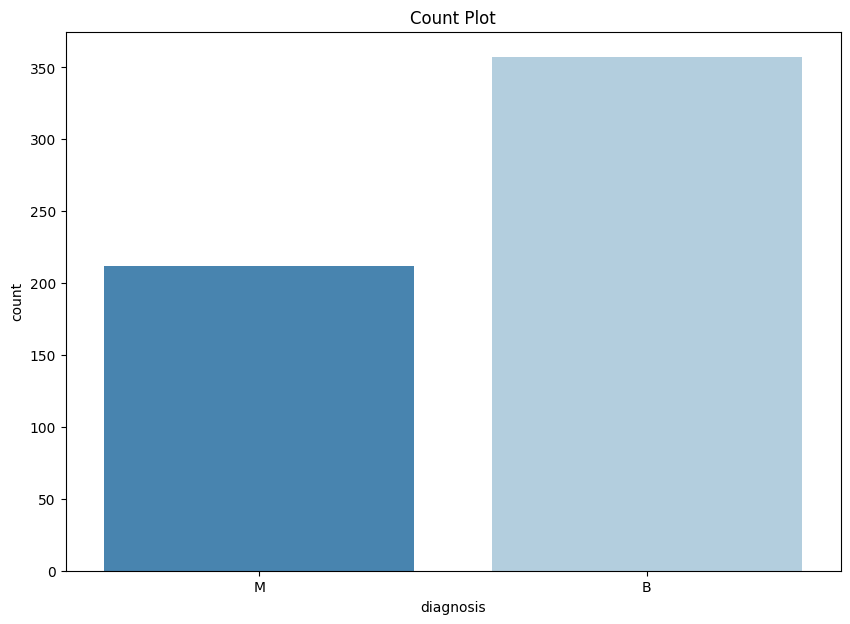

In [5]:
plt.figure(figsize=(10, 7))
plt.title('Count Plot')
sns.countplot(x=data['diagnosis'], palette='Blues_r')

In [6]:
le = LabelEncoder()
data.diagnosis = le.fit_transform(data.diagnosis)

In [7]:
X = data.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = data['diagnosis']

In [8]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X_1 = standardizer.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


In [11]:
for col in data.columns:
    print(col)

id
diagnosis
radius_mean
texture_mean
perimeter_mean
area_mean
smoothness_mean
compactness_mean
concavity_mean
concave points_mean
symmetry_mean
fractal_dimension_mean
radius_se
texture_se
perimeter_se
area_se
smoothness_se
compactness_se
concavity_se
concave points_se
symmetry_se
fractal_dimension_se
radius_worst
texture_worst
perimeter_worst
area_worst
smoothness_worst
compactness_worst
concavity_worst
concave points_worst
symmetry_worst
fractal_dimension_worst
Unnamed: 32


# # Feature selection based on chi-square 

(array([2.66104917e+02, 9.38975081e+01, 2.01110286e+03, 5.39916559e+04,
       1.49899264e-01, 5.40307549e+00, 1.97123536e+01, 1.05440354e+01,
       2.57379775e-01, 7.43065536e-05, 3.46752472e+01, 9.79353970e-03,
       2.50571896e+02, 8.75850471e+03, 3.26620664e-03, 6.13785332e-01,
       1.04471761e+00, 3.05231563e-01, 8.03633831e-05, 6.37136566e-03,
       4.91689157e+02, 1.74449400e+02, 3.66503542e+03, 1.12598432e+05,
       3.97365694e-01, 1.93149220e+01, 3.95169151e+01, 1.34854195e+01,
       1.29886140e+00, 2.31522407e-01]), array([8.01397628e-060, 3.32292194e-022, 0.00000000e+000, 0.00000000e+000,
       6.98631644e-001, 2.01012999e-002, 9.00175712e-006, 1.16563638e-003,
       6.11926026e-001, 9.93122221e-001, 3.89553429e-009, 9.21168192e-001,
       1.94877489e-056, 0.00000000e+000, 9.54425121e-001, 4.33366115e-001,
       3.06726812e-001, 5.80621137e-001, 9.92847410e-001, 9.36379753e-001,
       6.11324751e-109, 7.89668299e-040, 0.00000000e+000, 0.00000000e+000,
       5.28

<Axes: >

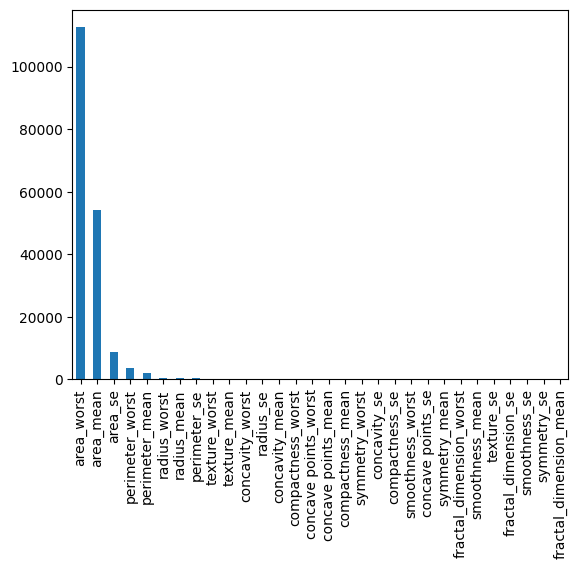

In [12]:
# These are chi-square score values , higher the value higher the importance of the target variable
chi_score=chi2(X,y)
print(chi_score)
chi_values = pd.Series(chi_score[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

In [13]:
chi2_features = SelectKBest(chi2, k = 5)

X_train_features = chi2_features.fit_transform(X_train, y_train)
X_test_features = chi2_features.transform(X_test)
print('Number of Original Features:', X_train.shape[1])
print('Selected Number of Features:', X_train_features.shape[1])

Number of Original Features: 30
Selected Number of Features: 5


In [14]:
print('Score list:', chi2_features.scores_)
print('Feature list:',X_train.columns)

Score list: [2.07305367e+02 7.46050345e+01 1.56559227e+03 4.22404263e+04
 1.29356778e-01 4.20692366e+00 1.50563976e+01 8.24743995e+00
 2.29546288e-01 7.69817667e-05 2.64161151e+01 1.15279315e-03
 1.90836419e+02 6.75868759e+03 2.05060955e-03 3.96724670e-01
 6.67125661e-01 2.18632089e-01 3.28682429e-05 1.60725722e-03
 3.80342179e+02 1.42925647e+02 2.83588600e+03 8.71737247e+04
 3.40612836e-01 1.49686395e+01 3.06247100e+01 1.05598670e+01
 1.20840426e+00 1.68929873e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

# Confusion matrix

In [15]:
def metrics(X,CV_clf):
    y_pred = CV_clf.predict(X)
    cm = confusion_matrix(y_test, y_pred)
    tn = cm[0,0]
    fp = cm[0,1]
    fn = cm[1,0]
    tp = cm[1,1]
    Accuracy=(tp+tn)/(tp+tn+fp+fn)
    Sensitivity=tp/(tp+fn)
    Specificity=tn/(tn+fp)
    Precision=tp/(tp+fp)
    F_measure=2*tp/(2*tp+fp+fn)
    print('Accuracy=%.4f'%Accuracy)
    print('Sensitivity=%.4f'%Sensitivity) # as the same as recall
    print('Specificity=%.4f'%Specificity)
    print('Precision=%.4f'%Precision)
    print('F-measure=%.4f'%F_measure)
    return Accuracy, Sensitivity, Specificity, Precision, F_measure
 #   plot_confusion_matrix(CV_clf, X_test, y_test)

# KNN Classifier

Accuracy=0.9649
Sensitivity=0.9302
Specificity=0.9859
Precision=0.9756
F-measure=0.9524


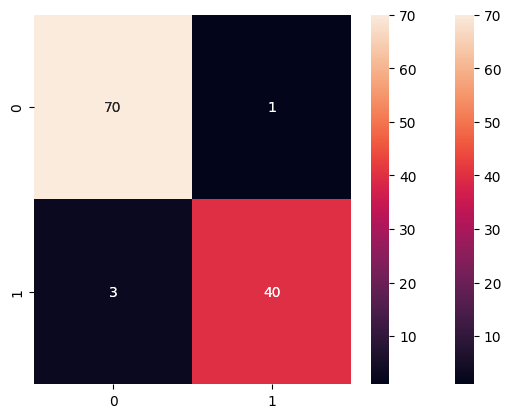

In [16]:
#Original data model KNN
# Importing KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train, y_train)
knn_model.score(X_test,y_test)

y_pred=knn_model.predict(X_test)
#print(classification_report(y_test, y_pred))


knn_model_metrics = metrics(X_test,knn_model)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
#print("Our accuracy is {}%".format(((cm[0][0] + cm[1][1])/57)*100))
#sum = 0
#for i in range(cm.shape[0]):
#    sum += cm[i][i]  
#accuracy = sum/X_test.shape[0]
#print('Accuracy=' , accuracy)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [17]:
# Chi - Square data Model  - KNN
knn_chi_square = KNeighborsClassifier(n_neighbors=15) 
knn_chi_square.fit(X_train_features,y_train)
knn_chi_square.score(X_test_features, y_test)


0.9736842105263158

Accuracy=0.9737
Sensitivity=0.9302
Specificity=1.0000
Precision=1.0000
F-measure=0.9639


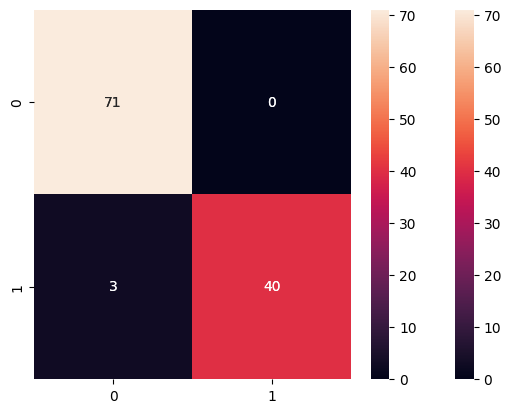

In [18]:
# CHisquare KNN model maetrics
y_pred_chi=knn_chi_square.predict(X_test_features)
knn_model_metrics_chi = metrics(X_test_features,knn_chi_square)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred_chi)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [19]:
print("Score on Test: " + str(knn_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(knn_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(knn_chi_square.score(X_test_features, y_test)*100))

Score on Test: 96.49122807017544
Score on Train: 92.3076923076923
Score using ChiSquare method: 97.36842105263158


# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
log_model = LogisticRegression(random_state=42)
#log_model.fit(X_train, y_train)

# # Support Vector Machine

Accuracy=0.9561
Sensitivity=0.9070
Specificity=0.9859
Precision=0.9750
F-measure=0.9398


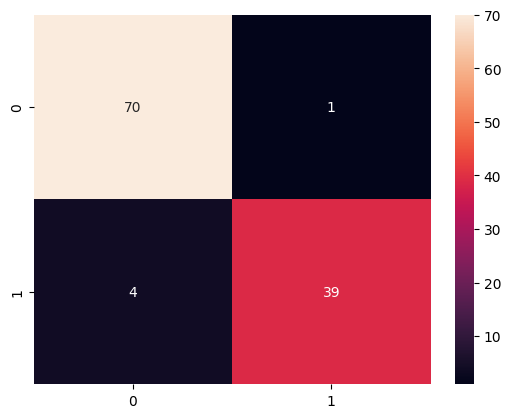

In [22]:
#Original data model SVM
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred=svm_model.predict(X_test)
#print(classification_report(y_test, y_pred))

svm_model_metrics = metrics(X_test,svm_model)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [23]:
# Chi - Square data Model  - SVM
svm_chi_square = SVC(kernel='linear', random_state=42)
svm_chi_square.fit(X_train_features,y_train)
svm_chi_square.score(X_test_features, y_test)

0.9736842105263158

Accuracy=0.9737
Sensitivity=0.9302
Specificity=1.0000
Precision=1.0000
F-measure=0.9639


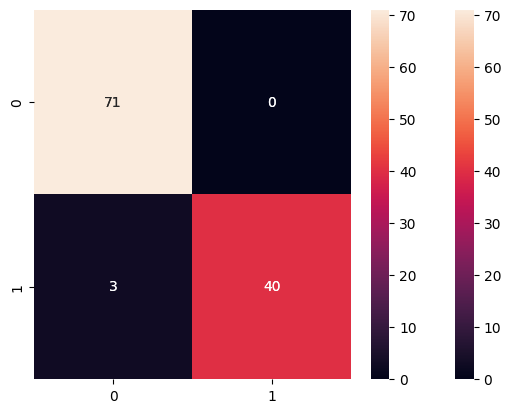

In [24]:
# CHisquare SVM model maetrics
y_pred_chi=svm_chi_square.predict(X_test_features)
svm_model_metrics_chi = metrics(X_test_features,svm_chi_square)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred_chi)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [25]:
print("Score on Test: " + str(svm_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(svm_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(svm_chi_square.score(X_test_features, y_test)*100))

Score on Test: 95.6140350877193
Score on Train: 96.92307692307692
Score using ChiSquare method: 97.36842105263158


# #Naive Bays

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy=0.9737
Sensitivity=0.9302
Specificity=1.0000
Precision=1.0000
F-measure=0.9639


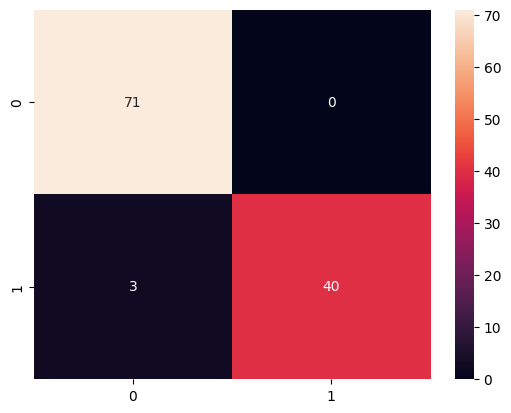

In [26]:
#Original data model Naive Bays
# Importing Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_pred=naive_model.predict(X_test)
print(classification_report(y_test, y_pred))

naive_model_metrics = metrics(X_test,naive_model)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [27]:
# Chi - Square data Model  - NaiveBays
bays_chi_square = GaussianNB()
bays_chi_square.fit(X_train_features,y_train)
bays_chi_square.score(X_test_features, y_test)

0.956140350877193

Accuracy=0.9561
Sensitivity=0.8837
Specificity=1.0000
Precision=1.0000
F-measure=0.9383


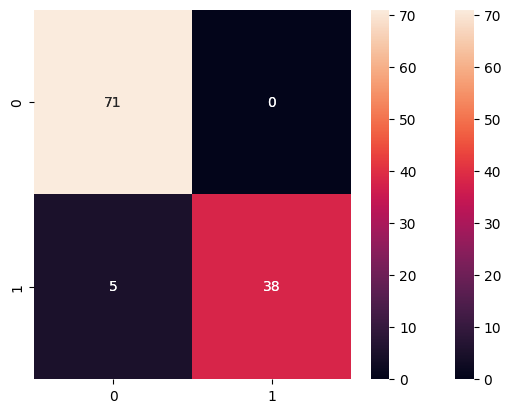

In [28]:
# CHisquare Naive Bays model maetrics
y_pred_chi=bays_chi_square.predict(X_test_features)
bays_model_metrics_chi = metrics(X_test_features,bays_chi_square)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred_chi)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [29]:
print("Score on Test: " + str(naive_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(naive_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(bays_chi_square.score(X_test_features, y_test)*100))

Score on Test: 97.36842105263158
Score on Train: 93.62637362637362
Score using ChiSquare method: 95.6140350877193


# # Decision Tree

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        71
           1       0.97      0.88      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114

Accuracy=0.9474
Sensitivity=0.8837
Specificity=0.9859
Precision=0.9744
F-measure=0.9268


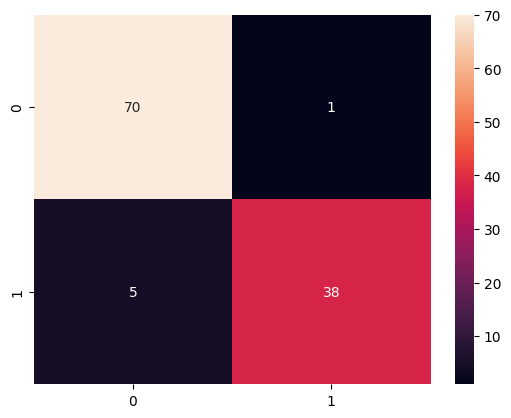

In [30]:
# Importing Decision Tree
from sklearn.tree import DecisionTreeClassifier

decision_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_model.fit(X_train, y_train)
y_pred=decision_model.predict(X_test)
print(classification_report(y_test, y_pred))

decision_model_metrics = metrics(X_test,decision_model)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [31]:
# Chi - Square data Model  - Decision tree
decision_chi_square =DecisionTreeClassifier(criterion='entropy', random_state=42)
decision_chi_square.fit(X_train_features,y_train)
decision_chi_square.score(X_test_features, y_test)

0.956140350877193

Accuracy=0.9561
Sensitivity=0.9302
Specificity=0.9718
Precision=0.9524
F-measure=0.9412


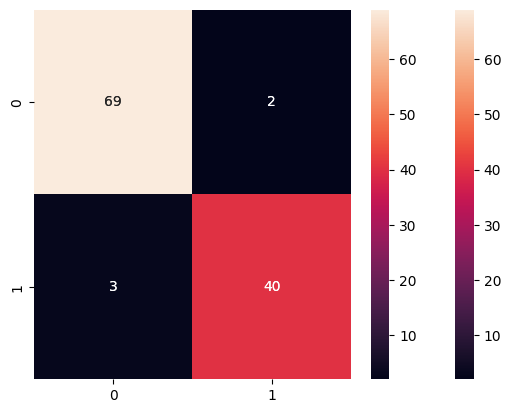

In [32]:
# CHisquare Decision Tree model maetrics
y_pred_chi=decision_chi_square.predict(X_test_features)
decision_model_metrics_chi = metrics(X_test_features,decision_chi_square)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred_chi)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [33]:
print("Score on Test: " + str(decision_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(decision_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(decision_chi_square.score(X_test_features, y_test)*100))

Score on Test: 94.73684210526315
Score on Train: 100.0
Score using ChiSquare method: 95.6140350877193


# # Bagging Decision tree

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy=0.9561
Sensitivity=0.9302
Specificity=0.9718
Precision=0.9524
F-measure=0.9412


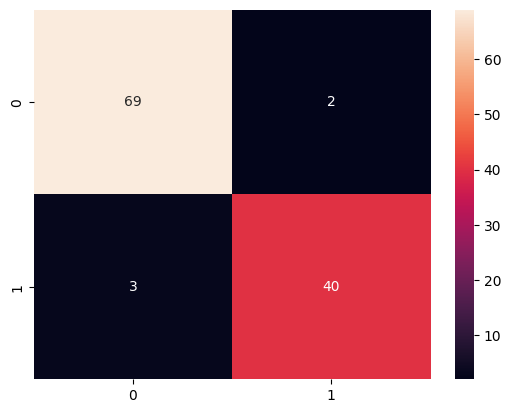

In [34]:
# Imprting Bagging Classifier
from sklearn.ensemble import BaggingClassifier
bg_model = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg_model.fit(X_train, y_train)
y_pred=bg_model.predict(X_test)
print(classification_report(y_test, y_pred))

bg_model_metrics = metrics(X_test,bg_model)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [35]:
# Chi - Square data Model  - bagging
bg_chi_square =BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=20)
bg_chi_square.fit(X_train_features,y_train)
bg_chi_square.score(X_test_features, y_test)

0.9736842105263158

Accuracy=0.9737
Sensitivity=0.9302
Specificity=1.0000
Precision=1.0000
F-measure=0.9639


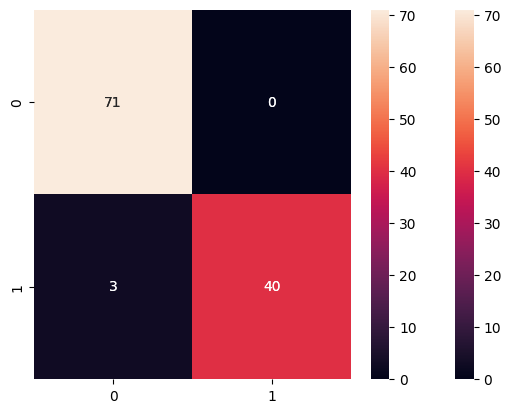

In [36]:
# CHisquare Bagging model maetrics
y_pred_chi=bg_chi_square.predict(X_test_features)
bg_model_metrics_chi = metrics(X_test_features,bg_chi_square)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred_chi)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [37]:
print("Score on Test: " + str(bg_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(bg_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(bg_chi_square.score(X_test_features, y_test)*100))

Score on Test: 95.6140350877193
Score on Train: 98.46153846153847
Score using ChiSquare method: 97.36842105263158


# # Boosting Decision tree

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy=0.9649
Sensitivity=0.9302
Specificity=0.9859
Precision=0.9756
F-measure=0.9524


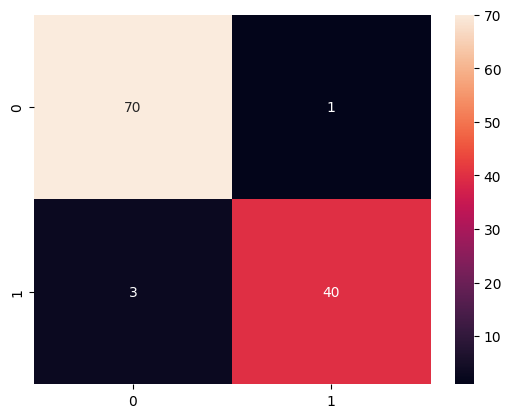

In [38]:
# Importing Boosting Algorithms
from sklearn.ensemble import AdaBoostClassifier

adb_model = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb_model.fit(X_train, y_train)
y_pred=adb_model.predict(X_test)
print(classification_report(y_test, y_pred))

adb_model_metrics = metrics(X_test,adb_model)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [39]:
# Chi - Square data Model  - boosting
adb_chi_square = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb_chi_square.fit(X_train_features,y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=4,
                                                    min_samples_split=10),
                   learning_rate=0.6, n_estimators=10)

Accuracy=0.9737
Sensitivity=0.9535
Specificity=0.9859
Precision=0.9762
F-measure=0.9647


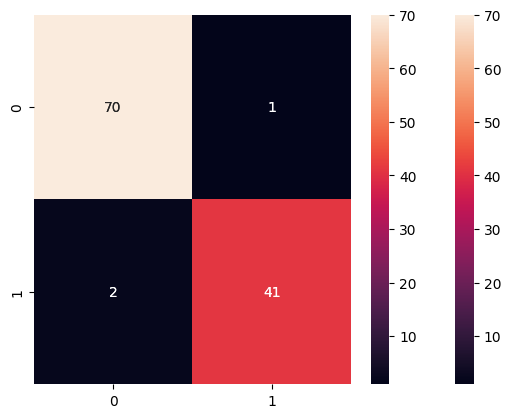

In [40]:
# CHisquare Boosting model maetrics
y_pred_chi=adb_chi_square.predict(X_test_features)
adb_model_metrics_chi = metrics(X_test_features,adb_chi_square)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred_chi)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [41]:
print("Score on Test: " + str(adb_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(adb_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(adb_chi_square.score(X_test_features, y_test)*100))

Score on Test: 96.49122807017544
Score on Train: 100.0
Score using ChiSquare method: 97.36842105263158


# # Random Forest

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy=0.9561
Sensitivity=0.9302
Specificity=0.9718
Precision=0.9524
F-measure=0.9412


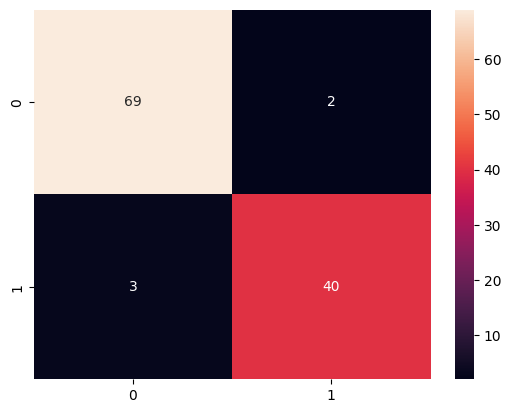

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=40, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred=rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

rf_model_metrics = metrics(X_test,rf_model)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [43]:
# Chi - Square data Model  - Random forest
rf_chi_square = RandomForestClassifier(n_estimators=40, max_depth=10)
rf_chi_square.fit(X_train_features,y_train)


RandomForestClassifier(max_depth=10, n_estimators=40)

Accuracy=0.9737
Sensitivity=0.9535
Specificity=0.9859
Precision=0.9762
F-measure=0.9647


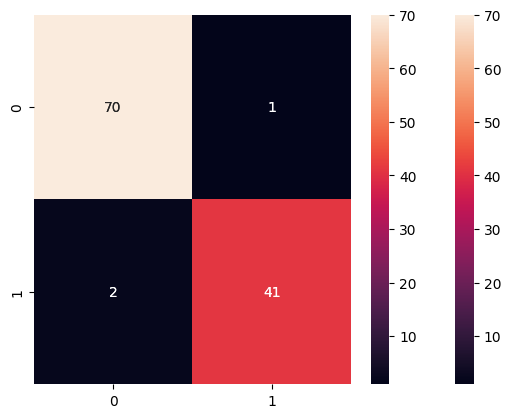

In [44]:
# CHisquare RandomForest model maetrics
y_pred_chi=rf_chi_square.predict(X_test_features)
rf_model_metrics_chi = metrics(X_test_features,rf_chi_square)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred_chi)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [45]:
print("Score on Test: " + str(rf_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(rf_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(rf_chi_square.score(X_test_features, y_test)*100))

Score on Test: 95.6140350877193
Score on Train: 99.78021978021978
Score using ChiSquare method: 97.36842105263158


# # voting classifier

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy=0.9737
Sensitivity=0.9302
Specificity=1.0000
Precision=1.0000
F-measure=0.9639


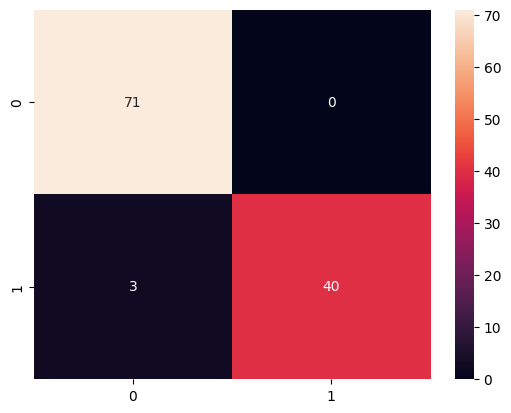

In [46]:
# Importing Voting Classifier
from sklearn.ensemble import VotingClassifier

evc=VotingClassifier(estimators=[('mnb',naive_model),('adb',adb_model),('rf',rf_model),('svm',svm_model)],voting='hard')
evc.fit(X_train, y_train)
y_pred=evc.predict(X_test)
print(classification_report(y_test, y_pred))

evc_metrics = metrics(X_test,evc)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy=0.9561
Sensitivity=0.9070
Specificity=0.9859
Precision=0.9750
F-measure=0.9398


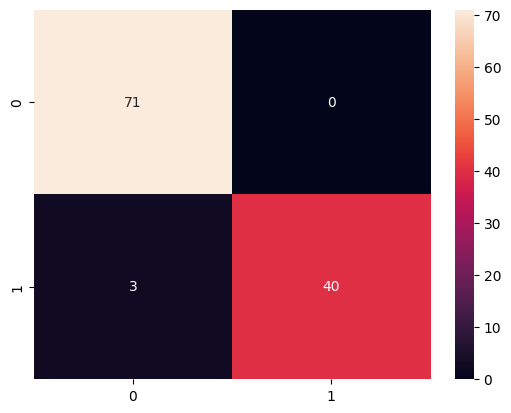

In [47]:
# chi-square data model
from sklearn.ensemble import VotingClassifier
chi_square_evc=VotingClassifier(estimators=[('dtrre',decision_chi_square),('adb',adb_chi_square),('rf',rf_chi_square),('svm',svm_chi_square)],voting='hard')
chi_square_evc.fit(X_train, y_train)

y_pred=evc.predict(X_test)
print(classification_report(y_test, y_pred))

evc_metrics = metrics(X_test,chi_square_evc)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [48]:
print("Score on Test: " + str(chi_square_evc.score(X_test, y_test)*100))
print("Score on Train: "+ str(chi_square_evc.score(X_train, y_train)*100))
#print("Score using ChiSquare method: "+ str(chi_square_evc.score(X_test_features, y_test)*100))

Score on Test: 95.6140350877193
Score on Train: 100.0


# # another combinationnnnnnnnn

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy=0.9649
Sensitivity=0.9302
Specificity=0.9859
Precision=0.9756
F-measure=0.9524


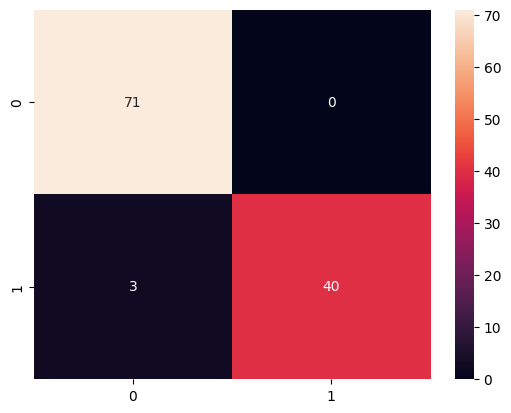

In [49]:
# chi-square data model
from sklearn.ensemble import VotingClassifier
chi_square_evc1=VotingClassifier(estimators=[('bg',bg_chi_square),('adb',adb_chi_square),('rf',rf_chi_square)],voting='hard')
chi_square_evc1.fit(X_train, y_train)

y_pred=evc.predict(X_test)
print(classification_report(y_test, y_pred))

evc_metrics = metrics(X_test,chi_square_evc1)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [50]:
print("Score on Test: " + str(chi_square_evc1.score(X_test, y_test)*100))
print("Score on Train: "+ str(chi_square_evc1.score(X_train, y_train)*100))
#print("Score using ChiSquare method: "+ str(chi_square_evc.score(X_test_features, y_test)*100))

Score on Test: 96.49122807017544
Score on Train: 100.0


# CatBoost (Decision tree)

Learning rate set to 0.5
0:	learn: 0.2336936	total: 62ms	remaining: 558ms
1:	learn: 0.1268027	total: 66.8ms	remaining: 267ms
2:	learn: 0.0850840	total: 71.5ms	remaining: 167ms
3:	learn: 0.0654672	total: 75.9ms	remaining: 114ms
4:	learn: 0.0482524	total: 80.5ms	remaining: 80.5ms
5:	learn: 0.0402320	total: 85.4ms	remaining: 56.9ms
6:	learn: 0.0311348	total: 90ms	remaining: 38.6ms
7:	learn: 0.0253232	total: 94.5ms	remaining: 23.6ms
8:	learn: 0.0213098	total: 98.9ms	remaining: 11ms
9:	learn: 0.0188896	total: 104ms	remaining: 0us
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy=0.9825
Sensitivity=0.9767
Specificity=0.9859
Precision=0.9767
F-measure=0.9767


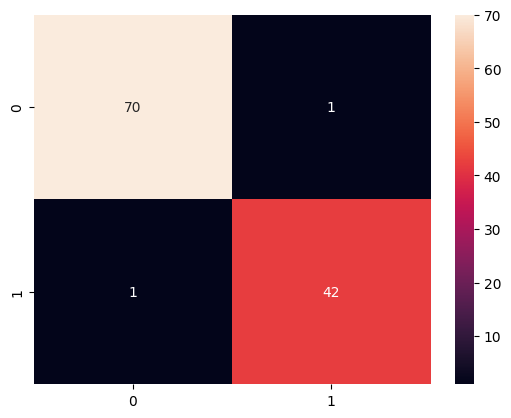

In [51]:
from catboost import CatBoostClassifier

catboost_model= CatBoostClassifier(iterations=10)
catboost_model.fit(X_train, y_train)
y_pred=catboost_model.predict(X_test)
print(classification_report(y_test, y_pred))

catboost_model_metrics = metrics(X_test,catboost_model)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [52]:
# Chi - Square data Model  - CATboosting
catboost_chi_square =  CatBoostClassifier(iterations=20)
catboost_chi_square.fit(X_train_features,y_train)


Learning rate set to 0.265987
0:	learn: 0.5469107	total: 1.33ms	remaining: 25.4ms
1:	learn: 0.4520207	total: 2.56ms	remaining: 23.1ms
2:	learn: 0.3873170	total: 3.77ms	remaining: 21.4ms
3:	learn: 0.3421685	total: 4.93ms	remaining: 19.7ms
4:	learn: 0.2997756	total: 6.1ms	remaining: 18.3ms
5:	learn: 0.2694903	total: 7.21ms	remaining: 16.8ms
6:	learn: 0.2521466	total: 8.38ms	remaining: 15.6ms
7:	learn: 0.2300606	total: 9.5ms	remaining: 14.2ms
8:	learn: 0.2159450	total: 10.7ms	remaining: 13ms
9:	learn: 0.2006909	total: 12.1ms	remaining: 12.1ms
10:	learn: 0.1892840	total: 13.3ms	remaining: 10.9ms
11:	learn: 0.1837177	total: 14.5ms	remaining: 9.63ms
12:	learn: 0.1757636	total: 15.6ms	remaining: 8.42ms
13:	learn: 0.1716067	total: 16.8ms	remaining: 7.21ms
14:	learn: 0.1682659	total: 18ms	remaining: 6.01ms
15:	learn: 0.1638886	total: 19.5ms	remaining: 4.87ms
16:	learn: 0.1610791	total: 20.8ms	remaining: 3.66ms
17:	learn: 0.1594144	total: 22ms	remaining: 2.44ms
18:	learn: 0.1574145	total: 23.2ms

In [53]:
print("Score on Test: " + str(catboost_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(catboost_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(catboost_chi_square.score(X_test_features, y_test)*100))

Score on Test: 98.24561403508771
Score on Train: 100.0
Score using ChiSquare method: 98.24561403508771


# LightGBM classifier (better than XGBoost)(faster)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

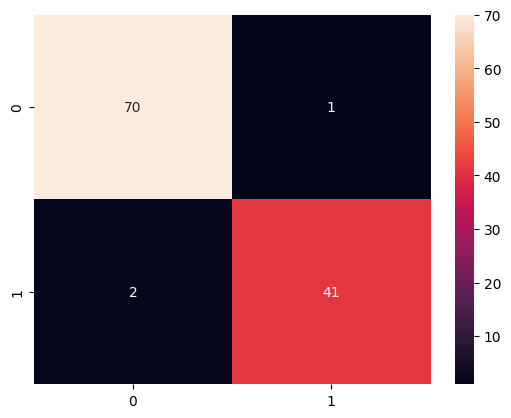

In [54]:
import lightgbm as lgb
lgbm_model= lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred=lgbm_model.predict(X_test)
print(classification_report(y_test, y_pred))


lgbm_model_metrics = metrics(X_test,lgbm_model)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [55]:
# Chi - Square data Model  - LGBM
lgbm_chi_square =  lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
lgbm_chi_square.fit(X_train_features,y_train)

[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 760
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 5
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371429 -> initscore=-0.526093
[LightGBM] [Info] Start training from score -0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [56]:
print("Score on Test: " + str(lgbm_model.score(X_test, y_test)*100))
print("Score on Train: "+ str(lgbm_model.score(X_train, y_train)*100))
print("Score using ChiSquare method: "+ str(lgbm_chi_square.score(X_test_features, y_test)*100))

Score on Test: 97.36842105263158
Score on Train: 100.0
Score using ChiSquare method: 94.73684210526315


# Ensemble  voting (top 4)

Learning rate set to 0.5
0:	learn: 0.2336936	total: 10.7ms	remaining: 96ms
1:	learn: 0.1268027	total: 16.2ms	remaining: 64.8ms
2:	learn: 0.0850840	total: 23ms	remaining: 53.8ms
3:	learn: 0.0654672	total: 28.7ms	remaining: 43.1ms
4:	learn: 0.0482524	total: 37.7ms	remaining: 37.7ms
5:	learn: 0.0402320	total: 43.6ms	remaining: 29.1ms
6:	learn: 0.0311348	total: 48.5ms	remaining: 20.8ms
7:	learn: 0.0253232	total: 53.3ms	remaining: 13.3ms
8:	learn: 0.0213098	total: 58.8ms	remaining: 6.54ms
9:	learn: 0.0188896	total: 65.3ms	remaining: 0us
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:Bo

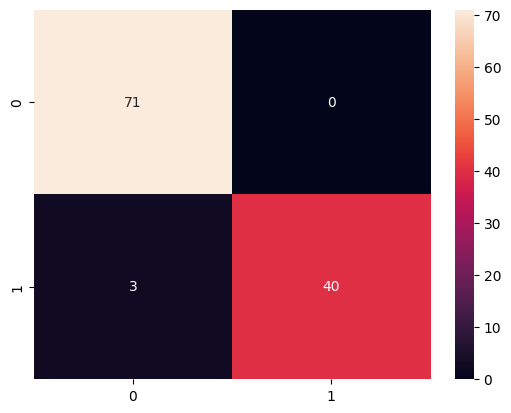

In [57]:
# Importing Voting Classifier
from sklearn.ensemble import VotingClassifier

evc1=VotingClassifier(estimators=[('cboost',catboost_model),('adb',adb_model),('bg',bg_model),('lgbm',lgbm_model)],voting='hard')
evc1.fit(X_train, y_train)
y_pred=evc.predict(X_test)
print(classification_report(y_test, y_pred))

evc1_metrics = metrics(X_test,evc1)
# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

# # # Result

In [58]:
from prettytable import PrettyTable

Models =  ['KNN Classifier', 'Logostic Regression', 'Support Vector Machine','Naive Bayes','Decision Tree','Bagging Decision Tree','Boosting Decision Tree','Random Forest','Voting Classifier','CatBoost','LightGBM']
Test_scores = [96.49,98.24,95.61,97.36,94.73,95.61,96.49,96.49,97.36,98.24,98.24]
Train_scores = [92.30,95.60,96.92,93.62,100,99.12,100,100,98.02,100,100]
Chi_square_score=[97.36,96.49,97.36,95.61,95.61,97.36,96.49,97.36,'-',98.24,94.73]

Results = PrettyTable()

Results.add_column('Model', Models)
Results.add_column('Test_Score', Test_scores)
Results.add_column('Train_Score', Train_scores)
Results.add_column('Chi-square_Score', Chi_square_score)


print('Results: ')
print(Results)


Results: 
+------------------------+------------+-------------+------------------+
|         Model          | Test_Score | Train_Score | Chi-square_Score |
+------------------------+------------+-------------+------------------+
|     KNN Classifier     |   96.49    |     92.3    |      97.36       |
|  Logostic Regression   |   98.24    |     95.6    |      96.49       |
| Support Vector Machine |   95.61    |    96.92    |      97.36       |
|      Naive Bayes       |   97.36    |    93.62    |      95.61       |
|     Decision Tree      |   94.73    |     100     |      95.61       |
| Bagging Decision Tree  |   95.61    |    99.12    |      97.36       |
| Boosting Decision Tree |   96.49    |     100     |      96.49       |
|     Random Forest      |   96.49    |     100     |      97.36       |
|   Voting Classifier    |   97.36    |    98.02    |        -         |
|        CatBoost        |   98.24    |     100     |      98.24       |
|        LightGBM        |   98.24    |  